# Pandas Advanced: Learning notebook

In this notebook we will cover the following: 

    - Selecting columns (brackets and dot notation)
    - Selecting rows (loc and iloc)
    - Subsetting on conditions
    - Select Dtypes
    - nlargest & nsmallest
    - groupby
    - pandas plotting

First, we import pandas, like we learned in the previous unit:

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

Now, we read the data that we'll use in this unit from the file __airbnb_input.csv__, which is located in the __data/__ directory.

For this, we'll use function __read_csv( )__, which was alreay shown in the previous unit.
We want to use column __room_id__ as the DataFrame index, and for that we use the argument __index_col__ in function read_csv( ).

In [19]:
# Read the data in file airbnb_input.csv into a pandas DataFrame and use column room_id as the DataFrame index.
df = pd.read_csv('data/healthcare_costs.csv')
df = df.set_index('patient_id')

# Preview the first rows of the DataFrame.
df.head()

,age,sex,bmi,children,smoker,region,charges
patient_id,,,,,,,
483,51,female,39.500,1,no,southwest,9880.06800
101,30,male,25.460,0,no,northeast,3645.08940
674,44,female,43.890,2,yes,southeast,46200.98510
1042,20,male,30.685,0,yes,northeast,33475.81715
693,24,male,23.655,0,no,northwest,2352.96845


## Selecting columns

### Selecting columns by name - dot notation

Using __dot notation__, you can select a column from a DataFrame, obtaining a Series with the column values.

This is how you can select the room_type column using dot notation:

In [24]:
df.region

patient_id
483     southwest
101     northeast
674     southeast
1042    northeast
693     northwest
          ...    
1136    southwest
520     northeast
912     northwest
847     southeast
609     southwest
Name: region, Length: 1338, dtype: object

### Selecting columns by name - brackets notation

Using __brackets__, you can select one or more columns from the DataFrame.

This is how you can select the room_type column using brackets. Note that the output is a Series:

In [25]:
df['region']

patient_id
483     southwest
101     northeast
674     southeast
1042    northeast
693     northwest
          ...    
1136    southwest
520     northeast
912     northwest
847     southeast
609     southwest
Name: region, Length: 1338, dtype: object

This is how you can select the room_type and neighborhood columns using brackets. Note that the output is a DataFrame:

In [26]:
df[['sex', 'region']]

,sex,region
patient_id,,
483,female,southwest
101,male,northeast
674,female,southeast
1042,male,northeast
693,male,northwest
...,...,...
1136,female,southwest
520,female,northeast
912,female,northwest


## Selecting rows

### Selecting rows by index position - iloc

With function [iloc](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html) you can select specific rows from a DataFrame.

In order to specify the rows you want to select you can use the row position (integer starting from 0), a list, or an array slice.

This is how you can select the first row (remember that Python starts indexing with a 0). Note that the output is a Series:

In [27]:
df.iloc[0]

age                51
sex            female
bmi              39.5
children            1
smoker             no
region      southwest
charges       9880.07
Name: 483, dtype: object

This is how you select rows 0, 2, 4 and 6. Note that the output is a DataFrame:

In [30]:
df.iloc[[0, 2, 4, 6]]

,age,sex,bmi,children,smoker,region,charges
patient_id,,,,,,,
483,51,female,39.500,1,no,southwest,9880.06800
674,44,female,43.890,2,yes,southeast,46200.98510
693,24,male,23.655,0,no,northwest,2352.96845
95,28,female,37.620,1,no,southeast,3766.88380


This is how you select the first 3 rows:

In [32]:
df.iloc[0:3]

,age,sex,bmi,children,smoker,region,charges
patient_id,,,,,,,
483,51,female,39.50,1,no,southwest,9880.0680
101,30,male,25.46,0,no,northeast,3645.0894
674,44,female,43.89,2,yes,southeast,46200.9851


### Selecting rows by index name - loc

With function [loc](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html) you can select specific rows from a DataFrame, like with iloc.

The difference here is that you specify the rows to select using the rows' indexes instead of the rows' positions in the DataFrame.

This is how you select the patient whose patient_id is 17:

In [33]:
df.loc[17]

age                23
sex              male
bmi            23.845
children            0
smoker             no
region      northeast
charges       2395.17
Name: 17, dtype: object

Note that if you search for an index that doesn't exist, you'll get a KeyError:

In [34]:
df.loc[9000]

KeyError: 9000

### Selecting rows & columns

We can use either loc or iloc to select rows and columns at the same time!

A - Index or list of indexes <br>
B - Column or list of columns <br>

df.loc[A,B]

Here's a few examples:

In [47]:
df.loc[17,'bmi']

23.845

In [49]:
df.loc[[10,13,14],['bmi','children']]

,bmi,children
patient_id,,
10,26.22,0
13,39.82,0
14,42.13,0


In [51]:
df.iloc[:10,:2] # first 10 rows and first 2 columns

,age,sex
patient_id,,
483,51,female
101,30,male
674,44,female
1042,20,male
693,24,male
1007,47,male
95,28,female
1314,30,female
1274,26,male


## Subsetting data on conditions

Using brackets notation, we can use conditions to subset data from the DataFrame.

By doing this, we get a DataFrame that (most likelly) has a different shape from the initial one, i.e, it's only a subset of it's rows.

Note that this is different from what we saw in the mask/filter functions: these functions don't change the DataFame shape, instead, they just replace the values that we don't want with NaNs.

Here we're subsetting the DataFrame to get all the male patients.

In [35]:
df.sex == 'male'

patient_id
483     False
101      True
674     False
1042     True
693      True
        ...  
1136    False
520     False
912     False
847      True
609      True
Name: sex, Length: 1338, dtype: bool

Here we're subsetting the DataFrame to get all the male patients.

Note the DataFrame shape!

In [38]:
df[df.sex == 'male']

,age,sex,bmi,children,smoker,region,charges
patient_id,,,,,,,
101,30,male,25.460,0,no,northeast,3645.08940
1042,20,male,30.685,0,yes,northeast,33475.81715
693,24,male,23.655,0,no,northwest,2352.96845
1007,47,male,28.215,3,yes,northwest,24915.22085
1274,26,male,27.060,0,yes,southeast,17043.34140
...,...,...,...,...,...,...,...
965,35,male,27.100,1,no,southwest,4746.34400
814,36,male,34.430,2,no,southeast,5584.30570
1304,42,male,24.605,2,yes,northeast,21259.37795


As another example, we're selecting the males older than 50.

Note the parenthesis around each condition, they're required!

In [39]:
df[(df.sex == 'male') & (df.age > 50)]

,age,sex,bmi,children,smoker,region,charges
patient_id,,,,,,,
1321,62,male,26.695,0,yes,northeast,28101.33305
323,57,male,40.945,0,no,northeast,11566.30055
382,55,male,33.000,0,no,southeast,20781.48892
1275,57,male,23.700,0,no,southwest,10959.33000
956,54,male,30.800,1,yes,southeast,41999.52000
...,...,...,...,...,...,...,...
1061,57,male,27.940,1,no,southeast,11554.22360
18,56,male,40.300,0,no,southwest,10602.38500
1294,58,male,25.175,0,no,northeast,11931.12525


### Also using columns

If we don't want all columns, we can simply use loc/iloc

In [52]:
df.loc[df.sex == 'male', 'smoker']

patient_id
101      no
1042    yes
693      no
1007    yes
1274    yes
       ... 
965      no
814      no
1304    yes
847      no
609     yes
Name: smoker, Length: 676, dtype: object

## Data Types

DataFrames have a class attribute that shows us the data type of each column. It's called __dtypes__ and can be used like this:

In [40]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Note that strings have the dtype __object__.

__Dtypes__ can also be used to subset DataFrames. For instance, this is how we select all the float64 columns from the DataFrame:

In [41]:
df.select_dtypes(include=['float64'])

,bmi,charges
patient_id,,
483,39.500,9880.06800
101,25.460,3645.08940
674,43.890,46200.98510
1042,30.685,33475.81715
693,23.655,2352.96845
...,...,...
1136,25.000,7623.51800
520,27.360,25656.57526
912,26.695,14382.70905


## nlargest and nsmallest

[nlargest](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.nlargest.html) is a function that can be used to select the n rows that have the largest values regarding certain column(s).

For instance, this is how we select the two rooms that had the highest number of reviews.

In [42]:
df.nlargest(n=2, columns='bmi')

,age,sex,bmi,children,smoker,region,charges
patient_id,,,,,,,
1317,18,male,53.13,0,no,southeast,1163.4627
1047,22,male,52.58,1,yes,southeast,44501.3982


[nsmallest](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.nsmallest.html)... 
Well, I'll let you extrapolate :)

But here's an example, where we sellect the 5 cheapest rooms:

In [43]:
df.nsmallest(n=5, columns='bmi')

,age,sex,bmi,children,smoker,region,charges
patient_id,,,,,,,
172,18,male,15.960,0,no,northeast,1694.79640
428,21,female,16.815,1,no,northeast,3167.45585
1226,38,male,16.815,2,no,northeast,6640.54485
412,26,female,17.195,2,yes,northeast,14455.64405
250,18,male,17.290,2,yes,northeast,12829.45510


## Group by

We can also represent subgroups of our data with a single datapoint.

Let's say i want to know the "average body mass index of each gender"

We could do it in a boring way..

In [12]:
df.loc[df.sex == 'male',:]

,age,sex,bmi,children,smoker,region,charges
patient_id,,,,,,,
101,30,male,25.460,0,no,northeast,3645.08940
1042,20,male,30.685,0,yes,northeast,33475.81715
693,24,male,23.655,0,no,northwest,2352.96845
1007,47,male,28.215,3,yes,northwest,24915.22085
1274,26,male,27.060,0,yes,southeast,17043.34140
...,...,...,...,...,...,...,...
965,35,male,27.100,1,no,southwest,4746.34400
814,36,male,34.430,2,no,southeast,5584.30570
1304,42,male,24.605,2,yes,northeast,21259.37795


In [56]:
df.loc[df.sex == 'male','bmi'].mean()

30.943128698224804

And repeat for female

In [15]:
df.loc[df.sex == 'female','bmi'].mean()

30.377749244713

But what if we want to do the same for all ages for example? We would need to create a bunch of lines of code by hand. Here's an easier way: **introducing groupby**

In [57]:
df.groupby(by='sex').bmi.mean()

sex
female    30.377749
male      30.943129
Name: bmi, dtype: float64

That easy huh..

Let's count the number of people in our dataset by age:

In [64]:
df.groupby(by='age').size().head(5)

age
18    69
19    68
20    29
21    28
22    28
dtype: int64

So there's 69 people aged 18, 68 people aged 19, etc..

## Extra material - Pandas plotting

Pandas allows out-of-the-box plotting to look at your data in an easy way.

Let's go back to the previous example:

In [65]:
df.groupby(by='age').size().head(3)

age
18    69
19    68
20    29
dtype: int64

It would be nice to have a bar plot so that we can compare distribution of people by age of our dataset.

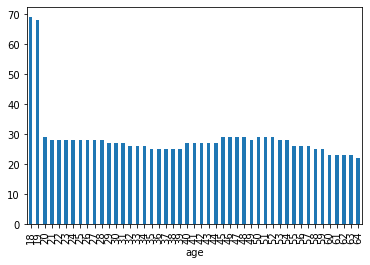

In [73]:
df.groupby(by='age').size().plot(kind='bar') # that easy

hum the plot is a bit condensed. We can change that!

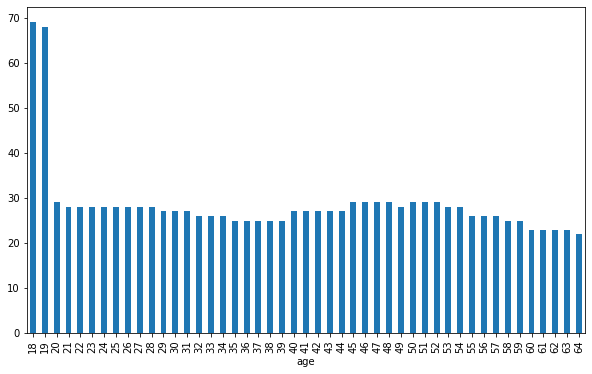

In [74]:
plt.figure(figsize=(10,6)) # (width, height) = (10,6)
df.groupby(by='age').size().plot(kind='bar')

What if we want to have a notion of the charges' distribution?

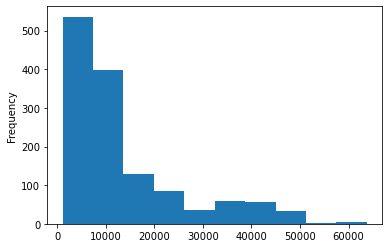

In [75]:
df.charges.plot(kind='hist')

Interesting, most charges are below $10k

----